# Linear Regression using Scikit-Learn

In this exercise, we want to predict the price of used Ducati Monster motorcycles by using the following data:

| Manufacture Year | Engine displacement in cc | Mileage | Price in USD |
| ---------------- | ------------------------- | ------- | ------------ |
| 2007 |  992 | 11750 |  7499 |
| 2014 | 1198 | 12000 |  8355 |
| 2016 |  821 |  4200 |  9500 |
| 2023 |  937 |   105 | 12798 |
| 2002 |  620 | 13700 |  2800 |
| 2023 |  937 |   882 | 10500 |
| 2000 |  750 | 38907 |  2200 |
| 2017 | 1198 |  7211 | 11499 |
| 2011 | 1078 |  5400 |  6850 |
| 2002 |  620 |  7000 |  2699 |
| 2002 |  620 | 27000 |  2299 |
| 2017 |  821 |  7500 |  8999 |
| 2022 |  937 |   619 | 12498 |
| 2015 |  821 |  4100 |  7200 |
| 2015 | 1198 | 12984 |  9995 |
| 2001 |  750 |  1475 |  3500 |
| 2006 |  620 |  7000 |  2250 |
| 2014 | 1198 | 12500 |  7500 |
| 2009 | 1078 | 12900 |  5250 |
| 2018 |  803 |  3450 |  7000 |

### TOOLS

We utilize the following tools from scikit-learn as well as matplotlib and NumPy:

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Loading the data set

In [2]:
X_train = np.array([
  [2007,992,11750], 
  [2014,1198,12000],
  [2016,821,4200],
  [2023,937,105],
  [2002,620,13700],
  [2023,937,882],
  [2000,750,38907],
  [2017,1198,7211],
  [2011,1078,5400],
  [2002,620,7000],
  [2002,620,27000],
  [2017,821,7500],
  [2022,937,619],
  [2015,821,4100],
  [2015,1198,12984],
  [2001,750,1475],
  [2006,620,7000],
  [2014,1198,12500],
  [2009,1078,12900],
  [2018,803,3450]
  ])
y_train = np.array([7499,8355,9500,12798,2800,10500,2200,11499,6850,2699,2299,8999,12498,7200,9995,3500,2250,7500,5250,7000])
X_features = ['year','cc','miles']

## Gradient Descent

Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  This model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization. Here it is referred to as 'standard score'.

### Scale and normalize the (training) data set

In [20]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(f"Content of normalized X:\n{X_norm}")

Peak to Peak range by column in Raw        X:[   23   578 38802]
Peak to Peak range by column in Normalized X:[3.09541557 2.85822427 4.24520922]
Content of normalized X:
[[-0.63254144  0.45568403  0.24242943]
 [ 0.30954156  1.47435911  0.26978118]
 [ 0.57870813 -0.3899152  -0.58359319]
 [ 1.52079113  0.18370767 -1.03161473]
 [-1.30545787 -1.38386516  0.45577302]
 [ 1.52079113  0.18370767 -0.94660551]
 [-1.57462444 -0.74101195  3.2135945 ]
 [ 0.71329141  1.47435911 -0.2541688 ]
 [-0.0942083   0.88095615 -0.45230482]
 [-1.30545787 -1.38386516 -0.27725367]
 [-1.30545787 -1.38386516  1.91088572]
 [ 0.71329141 -0.3899152  -0.22255019]
 [ 1.38620784  0.18370767 -0.97537954]
 [ 0.44412484 -0.3899152  -0.59453388]
 [ 0.44412484  1.47435911  0.37743763]
 [-1.44004116 -0.74101195 -0.88172718]
 [-0.76712473 -1.38386516 -0.27725367]
 [ 0.30954156  1.47435911  0.32448466]
 [-0.36337487  0.88095615  0.36824745]
 [ 0.8478747  -0.47892564 -0.66564841]]


### Create and fit the regression model

In [4]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 737, number of weight updates: 14741.0


### View parameters

Parameters are associated with the *normalized* input data.

In [38]:
w_norm = sgdr.coef_
b_norm = sgdr.intercept_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [2679.09616695  802.75434564 -139.47778782], b:[7059.20141143]


### Make predictions based on **existing training data**
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [6]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[ 5696.5508692   9034.4127127   8378.0083062  11424.90655784]
Target values 
[ 7499  8355  9500 12798]


#### Plot results
Let's plot the predictions versus the target values.

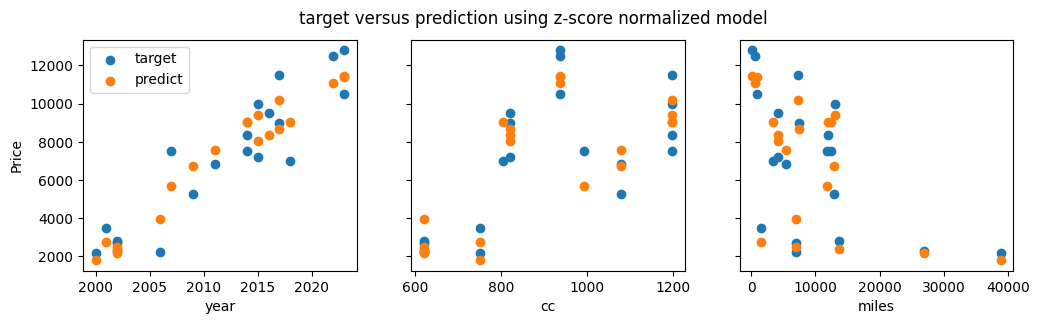

In [10]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

### Make predictions based on **new data**
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [52]:
# make a prediction using sgdr.predict() on a used 2016 Monster with 821cc and 10800 miles, listed for $6950
X_new_motorbike = np.array([[2016,821,10800]])
y_new_motorbike = np.array([6950])
# normalize data
X_new_motorbike_norm = (scaler.transform(X_new_motorbike))
# create prediction
y_pred_new_motorbike_norm = sgdr.predict(X_new_motorbike_norm)[0]

print(f"The predicted price is ${y_pred_new_motorbike_norm:0.2f} which is ${y_pred_new_motorbike_norm-y_new_motorbike[0]:0.2f} off the actual price")




The predicted price is $8277.29 which is $1327.29 off the actual price


## Linear Regression

Scikit-learn has the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) which implements a closed-form linear regression. This closed-form solution does not require normalization.

In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [ 3.61792755e+02  3.94482391e+00 -1.45781952e-02], b = -724169.70


### Make predictions based on **existing training data**

In [47]:
print(f"Prediction on training set for the first motorbike: ${linear_model.predict(X_train)[:1][0]:0.2f}" )
print(f"Actual price: ${y_train[:1][0]:0.2f}")

Prediction on training set for the first motorbike: $5690.34
Actual price: $7499.00


### Make predictions based on **new data**

In [53]:
y_pred_new_motorbike = linear_model.predict(X_new_motorbike)[0]
print(f"The predicted price is ${y_pred_new_motorbike:0.2f} which is ${y_pred_new_motorbike-y_new_motorbike[0]:0.2f} off the actual price")

The predicted price is $8285.76 which is $1335.76 off the actual price
